In [295]:
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
from scipy.spatial import distance
from statistics import mean

In [296]:
cwd = os.getcwd()
print(cwd)

C:\Users\User


In [297]:
file = pd.read_csv("Desktop/kmeansClustering.csv")
file

,No,x,y
0,1,18,40
1,2,28,23
2,3,57,3
3,4,75,50
4,5,39,84
5,6,89,86
6,7,16,70
7,8,56,30
8,9,43,46
9,10,65,1


In [298]:
x = file['x']
y = file['y']

In [299]:
centroid1 = random.randint(0,29)
centroid2 = random.randint(0,29)
centroid3 = random.randint(0,29)
while centroid2 == centroid1:
    centroid2 = random.randint(0,29)
while centroid3 == centroid1 or centroid3 == centroid2:
    centroid3 = random.randint(0,29)
centroid1 = [x[centroid1],y[centroid1]]
centroid2 = [x[centroid2],y[centroid2]]
centroid3 = [x[centroid3],y[centroid3]]
centroid1, centroid2, centroid3

([7, 69], [47, 48], [80, 25])

In [300]:
def itungjarak(x,y,centroid1,centroid2,centroid3):
    nearc1, nearc2, nearc3 = [],[],[]
    for k in range (len(x)):
        if distance.euclidean([x[k],y[k]],centroid1) <= distance.euclidean([x[k],y[k]],centroid2) and distance.euclidean([x[k],y[k]],centroid1) <= distance.euclidean([x[k],y[k]],centroid3):
            nearc1.append(k)
        elif distance.euclidean([x[k],y[k]],centroid2) <= distance.euclidean([x[k],y[k]],centroid1) and distance.euclidean([x[k],y[k]],centroid2) <= distance.euclidean([x[k],y[k]],centroid3):
            nearc2.append(k)
        else:
            nearc3.append(k)
    return nearc1,nearc2,nearc3

In [301]:
def cluster(nearc1,nearc2,nearc3):
    x1,y1 = [],[]
    for i in nearc1:
        x1.append(x[i])
        y1.append(y[i])

    x2,y2 = [],[]
    for i in nearc2:
        x2.append(x[i])
        y2.append(y[i])
        
    x3,y3 = [],[]
    for i in nearc3:
        x3.append(x[i])
        y3.append(y[i])
    return x1,y1,x2,y2,x3,y3

In [302]:
def graph(x1,y1,x2,y2,x3,y3,centroid1,centroid2,centroid3):
    plt.scatter(x1,y1,c = 'orange')
    plt.scatter(x2,y2,c = 'cyan')
    plt.scatter(x3,y3,c = 'gray')
    plt.scatter(centroid1[0],centroid1[1],c = 'red',label = 'Centroid 1')
    plt.scatter(centroid2[0],centroid2[1],c = 'blue',label ='Centroid 2')
    plt.scatter(centroid3[0],centroid3[1],c = 'black',label = 'Centroid 3')
    plt.xlabel('x')
    plt.ylabel('y')

In [303]:
def newcentroid(x,y,nearc1,nearc2,nearc3):
    totalx,totaly = 0,0
    for k in nearc1:
        totalx = totalx + x[k]
        totaly = totaly + y[k]
    centroid1 = [totalx/len(nearc1),totaly/len(nearc1)]

    totalx,totaly = 0,0
    for k in nearc2:
        totalx = totalx + x[k]
        totaly = totaly + y[k]
    centroid2 = [totalx/len(nearc2),totaly/len(nearc2)]
    
    totalx,totaly = 0,0
    for k in nearc3:
        totalx = totalx + x[k]
        totaly = totaly + y[k]
    centroid3 = [totalx/len(nearc3),totaly/len(nearc3)]
    
    return centroid1,centroid2,centroid3

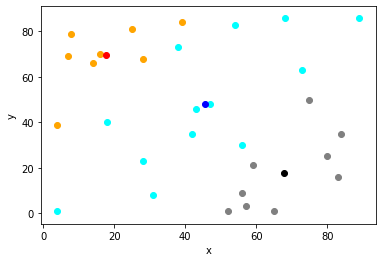

In [304]:
prevc1,prevc2,prevc3 = centroid1,centroid2,centroid3
nearc1,nearc2,nearc3 = itungjarak(x,y,centroid1,centroid2,centroid3)
x1,y1,x2,y2,x3,y3 = cluster(nearc1,nearc2,nearc3)
centroid1,centroid2,centroid3 = newcentroid(x,y,nearc1,nearc2,nearc3)
graph(x1,y1,x2,y2,x3,y3,centroid1,centroid2,centroid3)

In [305]:
z = 0
while (prevc1 != centroid1 or prevc2 != centroid2 or prevc3 != centroid3) and z<=100:
    prevc1,prevc2,prevc3 = centroid1,centroid2,centroid3
    nearc1,nearc2,nearc3 = itungjarak(x,y,centroid1,centroid2,centroid3)
    x1,y1,x2,y2,x3,y3 = cluster(nearc1,nearc2,nearc3)
    centroid1,centroid2,centroid3 = newcentroid(x,y,nearc1,nearc2,nearc3)
    z += 1

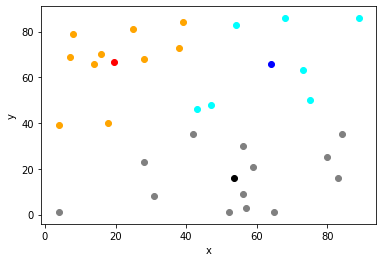

In [306]:
graph(x1,y1,x2,y2,x3,y3,centroid1,centroid2,centroid3)